<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/An%C3%A1lise_Descritiva_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dados = pd.read_csv('/content/dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Visualize o conteúdo do DataFrame

In [4]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intervalos das classes em reais (R$)

In [0]:
#usando uma funcionalidade do pandas chamada CUT
#criando os limites
classes = [0,1576,3152,7880,15760,200000]

In [96]:
classes = [
    dados.Renda.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    dados.Renda.max()
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [0]:
labels = ['E', 'D', 'C', 'B', 'A']


### 3º Construir a coluna de frequências

In [16]:
#colocando os parâmetros
frequencia = pd.value_counts(pd.cut(x = dados.Renda, bins = classes,labels = labels,include_lowest = True))
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [17]:
#igual a de frequencia, mas com o normalize
percentual = pd.value_counts(pd.cut(x = dados.Renda,bins = classes,labels = labels,include_lowest = True), normalize = True)
percentual

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [29]:
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual *100})
dist_freq.rename_axis('Classe', axis= 'columns', inplace = True)
dist_freq.sort_index(ascending=False, inplace=True)
dist_freq

Classe,Frequência,Porcentagem(%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

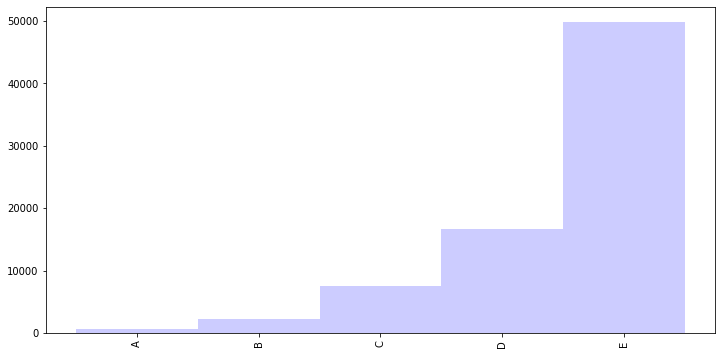

In [33]:
dist_freq['Frequência'].plot.bar(width=1,color = 'blue', alpha = 0.2,figsize=(12,6))

> ### Conclusões
Há uma distribuição bastante desigual de rendas, com a classe E representando quase 65% do total da amostra, enquanto a classe A representa menos de 1% da amostra, vemos que há um desequilíbrio, no qual mais de 86% do dataset tem uma renda inferior a 5 salarios mínimos.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

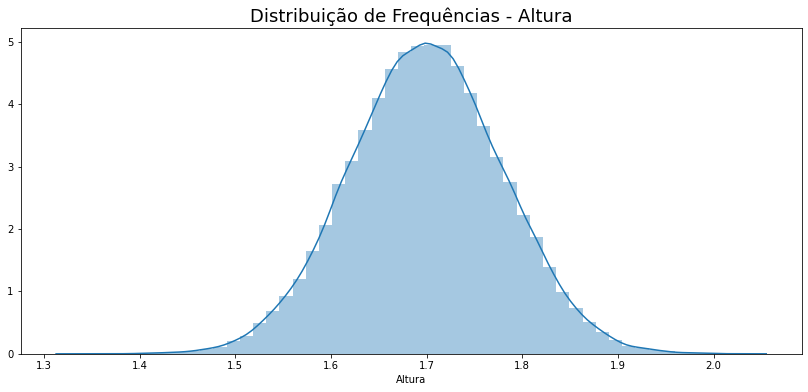

In [37]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Altura', fontsize = 18)
ax

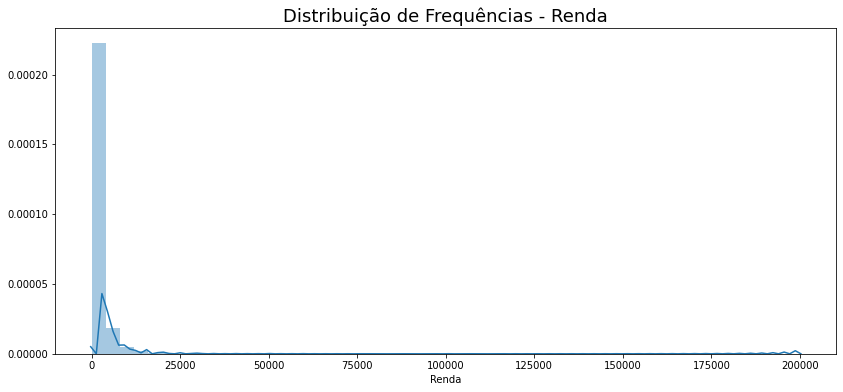

In [38]:
ax = sns.distplot(dados.Renda)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Renda', fontsize = 18)
ax

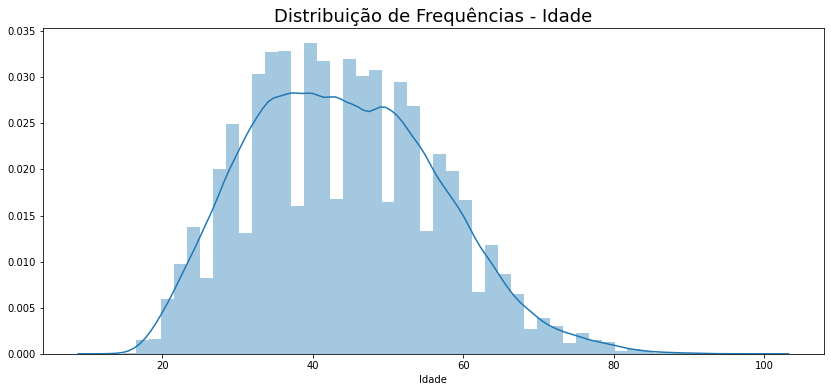

In [39]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Idade', fontsize = 18)
ax

> ### Conclusões

A distribuição de Idades é bem simétrica, enquanto a de Renda é extremamente assimétrica à direita, enquanto a de idade é levemente assimétrica à direita, indicando que a moda deve ser maior que a mediana que por sua vez deve ser maior que a média dos valores. 

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

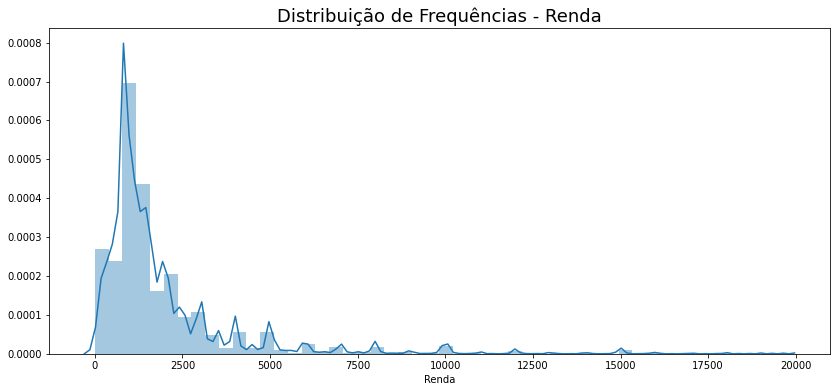

In [42]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Renda', fontsize = 18)
ax

### Construa uma tabela de frequências e uma com os percentuais do DF cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [0]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [45]:
#cruzando duas variáveis
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [46]:
#DF cruzado agregado por percentual de frequência
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize= True) *100
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [49]:
#agregando dados com uma função (tridimensional, cruza Sexo com cor com a média da renda)
media_renda = pd.crosstab(dados.Sexo,
                    dados.Cor,
                    aggfunc = 'mean',
                    values = dados.Renda)
media_renda.rename(index=sexo, inplace=True)
media_renda.rename(columns=cor, inplace=True)
media_renda

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [0]:
#brincando aqui: cruzar Sexo com UF, pela média de renda, bem  como Sexo e anos de estudo

In [51]:
media_renda_por_uf = pd.crosstab(dados.UF,
                    dados.Sexo,
                    aggfunc = 'mean',
                    values = dados.Renda)
media_renda_por_uf.rename(index=uf, inplace=True)
media_renda_por_uf.rename(columns=sexo, inplace=True)
media_renda_por_uf

Sexo,Masculino,Feminino
UF,,
Rondônia,1921.209139,1414.854637
Acre,1635.342407,1128.615063
Amazonas,1539.989460,1235.832849
Roraima,1875.788136,1608.112903
Pará,1509.741894,1131.884114
Amapá,1930.396970,1736.164835
Tocantins,1912.509395,1381.798851
Maranhão,1165.172097,723.752542
Piauí,1146.710618,899.858757


In [55]:
#e agora por anos de estudo, because fun
media_renda_por_anos_de_estudo = pd.crosstab(dados['Anos de Estudo'],
                    dados.Sexo,
                    aggfunc = 'mean',
                    values = dados.Renda)
media_renda_por_anos_de_estudo.rename(index=anos_de_estudo, inplace=True)
media_renda_por_anos_de_estudo.rename(columns=sexo, inplace=True)
media_renda_por_anos_de_estudo

Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,799.494638,516.201748
1 ano,895.629047,492.771987
2 anos,931.178986,529.911638
3 anos,1109.203862,546.853916
4 anos,1302.329283,704.279111
5 anos,1338.653218,781.389776
6 anos,1448.875419,833.732824
7 anos,1465.497940,830.751004
8 anos,1639.396667,933.615351


In [56]:
#brincando aqui: cruzar Cor com UF, pela média de renda, bem  como Cor  e anos de estudo (também com a média de renda)
media_renda_por_uf_cor = pd.crosstab(dados.UF,
                    dados.Cor,
                    aggfunc = 'mean',
                    values = dados.Renda)
media_renda_por_uf_cor.rename(index=uf, inplace=True)
media_renda_por_uf_cor.rename(columns=cor, inplace=True)
media_renda_por_uf_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
UF,,,,,
Rondônia,2800.000000,2108.609756,1736.709091,3176.666667,1601.244240
Acre,385.296296,2326.710526,1187.010870,2650.000000,1348.602236
Amazonas,632.965517,2049.029155,1645.715447,2500.000000,1331.148568
Roraima,978.200000,2412.812500,1535.114754,3000.000000,1699.729282
Pará,716.363636,1968.175949,1232.555794,5824.142857,1270.240829
Amapá,998.000000,2839.182692,1554.700000,1266.666667,1624.872881
Tocantins,NaN,2572.544872,1318.341463,2344.000000,1555.486683
Maranhão,350.000000,1683.049563,746.327138,1900.000000,891.525322
Piauí,788.000000,1585.742489,743.715232,NaN,991.179177


In [57]:
media_renda_por_estudo_cor = pd.crosstab(dados['Anos de Estudo'],
                    dados.Cor,
                    aggfunc = 'mean',
                    values = dados.Renda)
media_renda_por_estudo_cor.rename(index=anos_de_estudo, inplace=True)
media_renda_por_estudo_cor.rename(columns=cor, inplace=True)
media_renda_por_estudo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Anos de Estudo,,,,,
Sem instrução e menos de 1 ano,405.612245,993.123944,705.363296,905.555556,639.783193
1 ano,608.800000,991.222527,698.597701,394.000000,752.051313
2 anos,830.666667,1001.106969,870.996169,940.000000,755.618182
3 anos,834.823529,1215.479010,898.113573,802.666667,862.308033
4 anos,748.272727,1345.127097,1032.780980,1140.476190,1019.996374
5 anos,600.217391,1406.906250,1037.780115,1178.285714,1069.499147
6 anos,1114.583333,1543.776744,1075.772881,1821.666667,1155.877358
7 anos,755.500000,1538.258511,1189.803175,1800.000000,1151.678899
8 anos,866.644444,1696.337847,1179.218889,1860.961538,1295.746865


In [60]:
dados.query('Cor == 0').sort_values(by='Renda', ascending=False)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
43694,33,1,53,0,13,120000,1.661979
54253,35,1,41,0,13,12500,1.686233
32618,31,0,58,0,12,10000,1.587622
53967,35,1,51,0,16,9500,1.772169
46776,35,0,54,0,16,7000,1.848724
...,...,...,...,...,...,...,...
65368,43,0,72,0,7,0,1.753737
8107,15,0,57,0,1,0,1.735393
8106,15,0,60,0,1,0,1.614045
19898,25,0,21,0,9,0,1.630092


In [61]:
dados.sort_values(by='Renda', ascending=False)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
43693,33,0,79,2,16,200000,1.681105
28110,29,0,51,2,12,200000,1.587794
56141,41,0,42,2,16,200000,1.580848
43694,33,1,53,0,13,120000,1.661979
43679,33,1,65,2,12,100000,1.773411
...,...,...,...,...,...,...,...
58421,41,1,64,4,1,0,1.713674
13724,22,1,48,2,5,0,1.744701
18709,24,0,63,8,1,0,1.712092
26461,29,0,40,8,3,0,1.818779


> ### Conclusões

Em geral, mulheres ganham menos que homens (exceto mulheres indígenas), negros ganham menos que brancos, e descendentes de asiáticos ganham mais que todo mundo. O estado com maior renda média é o DF.

Olhando todos os cruzamentos posso inferir que há uma grande discrepância de salário entre indígenas, vou chutar que um dos maiores salários pertence a uma mulher indígena do Rio de Janeiro com 12 anos de estudo. Investigando o DF, vemos que efetivamente, uma mulher indígena com 12 anos de estudo tem um salário de 120mil. Efetivamente é o quarto maior salário do DF, mas a discrepância salta aos olhos pois o grupo indígena representa uma pequena porcentagem do DataFrame

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritmética

In [62]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [63]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [64]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [65]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [66]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [67]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [69]:
media_renda = pd.crosstab(dados.Cor,
                    dados.Sexo,
                    aggfunc = {'mean', 'median', 'max'},
                    values = dados.Renda)
media_renda.rename(index=cor, inplace=True)
media_renda.rename(columns=sexo, inplace=True)
media_renda

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

O maior valor de salário é de um homem Branco, o maior salário feminino é de uma mulher indígena. A mediana das Rendas de pardos e negros é a mesma, mas os valores máximos são bem discrepantes, e apesar dos valores máximos de negros e asiáticos estarem bem próximos, a distribuição é BEM diferente, sendo um a menor média entre as mulheres, e o outro a maior tanto entre homens quanto entre mulheres

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [70]:
dispersao_renda = pd.crosstab(dados.Cor,
                    dados.Sexo,
                    aggfunc = {'mad', 'var', 'std'},
                    values = dados.Renda)
dispersao_renda.rename(index=cor, inplace=True)
dispersao_renda.rename(columns=sexo, inplace=True)
dispersao_renda

mad               ...           var              
Sexo        Masculino     Feminino  ...     Masculino      Feminino
Cor                                 ...                            
Indígena   798.910889  3007.892952  ...  1.449841e+06  1.429818e+08
Branca    2261.012346  1670.967106  ...  2.257002e+07  1.056909e+07
Preta      975.602482   705.453357  ...  3.749294e+06  1.821960e+06
Amarela   3709.597211  2549.146322  ...  3.295707e+07  1.392166e+07
Parda     1125.827704   811.580946  ...  5.345747e+06  2.547960e+06

[5 rows x 6 columns]

> ### Conclusões

a distribuição mais constante é entre mulheres negras

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [81]:
cor

{0: 'Indígena',
 2: 'Branca',
 4: 'Preta',
 6: 'Amarela',
 8: 'Parda',
 9: 'Sem declaração'}

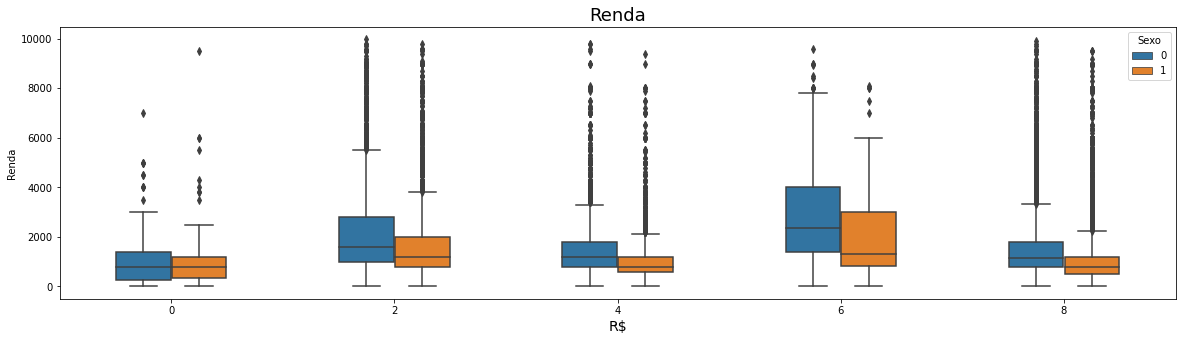

In [80]:
ax = sns.boxplot(x = 'Cor', y='Renda', data=dados.query('Renda < 10000'), orient='v', hue='Sexo', width=0.5)
ax.figure.set_size_inches(20,5)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize = 14)
ax

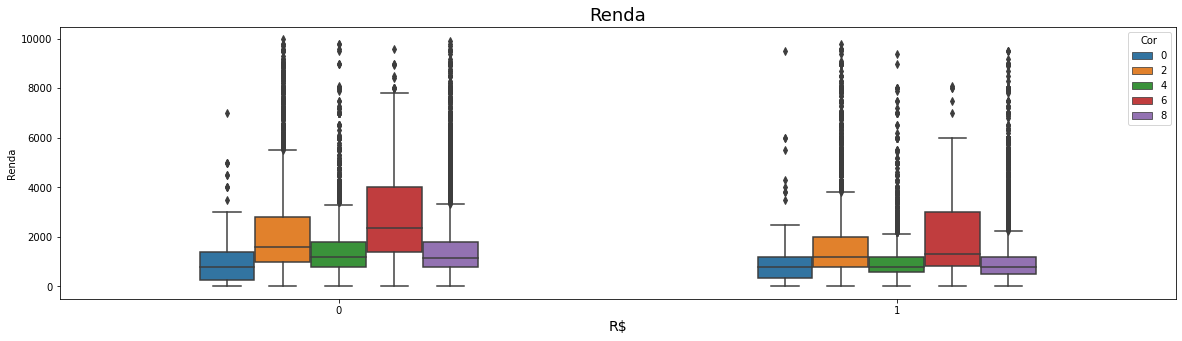

In [82]:
ax = sns.boxplot(x = 'Sexo', y='Renda', data=dados.query('Renda < 10000'), orient='v', hue='Cor', width=0.5)
ax.figure.set_size_inches(20,5)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize = 14)
ax

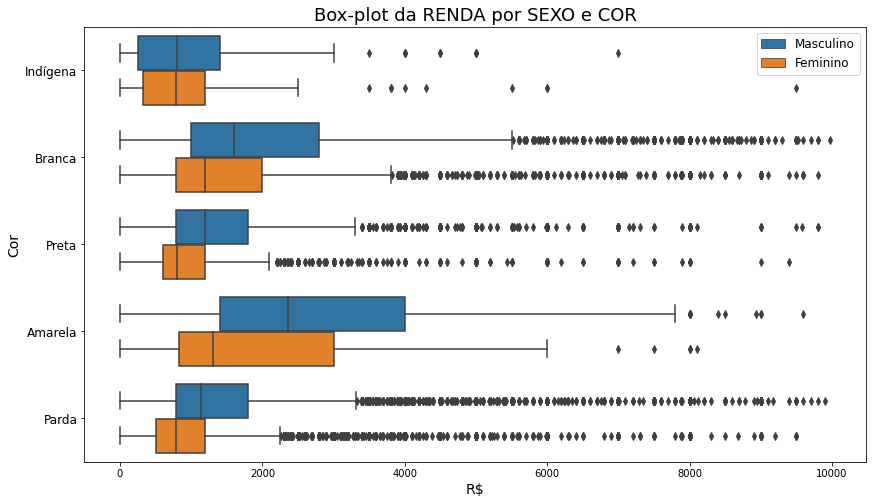

In [99]:
#da correção
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

mulheres ganham menos que homens num geral. a menor quantidade de "outliers" está entre os asiáticos, a mediana entre os indígenas é praticamente igual entre homens e mulheres. Mesmo com a renda limitada a 10mil, é perceptível o desvio à direita da variável

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [101]:
from scipy import stats
percentual = stats.percentileofscore(dados.Renda,788, kind='weak') #kind é o tipo do corte, weak inclui o valor pesquisado
print("{0:.2f}%".format(percentual))



28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [85]:
dados.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [87]:
renda_estudo_sexo = pd.crosstab(dados['Anos de Estudo'],
                    dados.Sexo,
                    aggfunc = {'mean', 'median', 'max', 'std'},
                    values = dados.Renda)
renda_estudo_sexo.rename(index=anos_de_estudo, inplace=True)
renda_estudo_sexo.rename(columns=sexo, inplace=True)
renda_estudo_sexo

max            ...          std             
Sexo                           Masculino  Feminino  ...    Masculino     Feminino
Anos de Estudo                                      ...                          
Sem instrução e menos de 1 ano   30000.0   10000.0  ...  1023.904884   639.311534
1 ano                            30000.0    2000.0  ...  1331.950552   425.291842
2 anos                           40000.0    4000.0  ...  1435.173827   498.234168
3 anos                           80000.0    3500.0  ...  2143.800133   424.124446
4 anos                           50000.0   10000.0  ...  1419.821787   629.553397
5 anos                           35000.0    8000.0  ...  1484.650587   635.782641
6 anos                           25000.0    6000.0  ...  1476.628602   574.547028
7 anos                           40000.0    9000.0  ...  1419.708673   602.038029
8 anos                           30000.0   18000.0  ...  1515.583715   896.781213
9 anos                           60000.0   20000.0  ...  2137.664774   973.221652
10 anos                          45000.0    6000.0  ...  2078.609734   620.611907
11 anos                         200000.0  100000.0  ...  2676.538942  1819.040417
12 anos                          30000.0  120000.0  ...  2268.081538  4851.833513
13 anos                          25000.0   20000.0  ...  2797.116800  2053.789771
14 anos                          50000.0   20000.0  ...  3987.214974  2064.083336
15 anos ou mais                 200000.0  100000.0  ...  7447.613594  4212.770709
Não determinados                  7000.0    3000.0  ...   979.648745   459.985964

[17 rows x 8 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

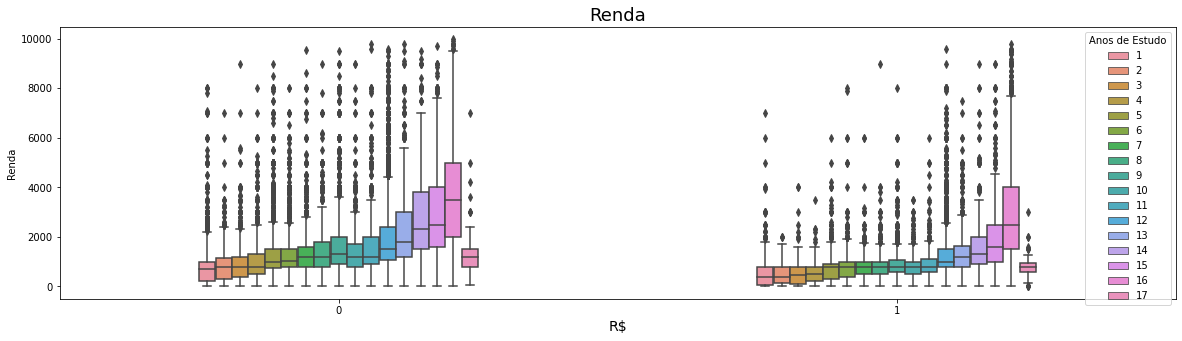

In [92]:
ax = sns.boxplot(x = 'Sexo', y='Renda', data=dados.query('Renda < 10000'), orient='v', hue='Anos de Estudo', width=0.5)
ax.figure.set_size_inches(20,5)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize = 14)
ax

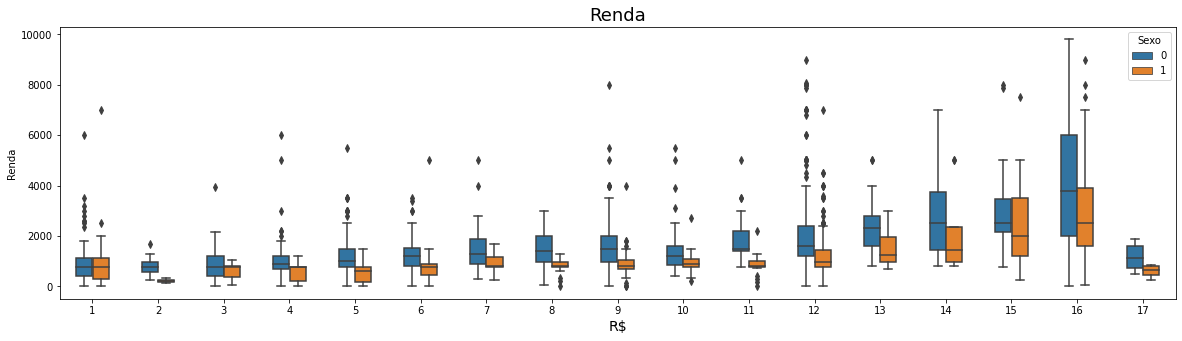

In [91]:
ax = sns.boxplot(x = 'Anos de Estudo', y='Renda', data=dados.query('Renda < 10000 and Idade == 38'), orient='v', hue='Sexo', width=0.5)
ax.figure.set_size_inches(20,5)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize = 14)
ax

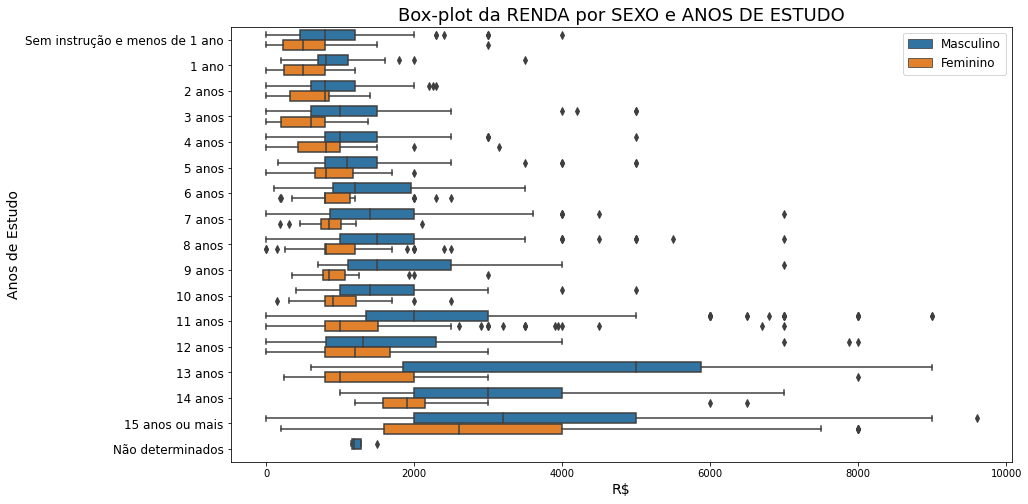

In [102]:
#da correção
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=dados.query('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Num geral, mais estudo significa mais renda, mas mesmo assim a discrepância entre homens e mulheres é visível, mesmo fazendo um query por idade. Interessante ver também que a média é a mesma para mulheres com 4 a 12 anos de estudo

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [94]:
renda_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_por_uf.rename(index=uf, inplace=True)
renda_por_uf

Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

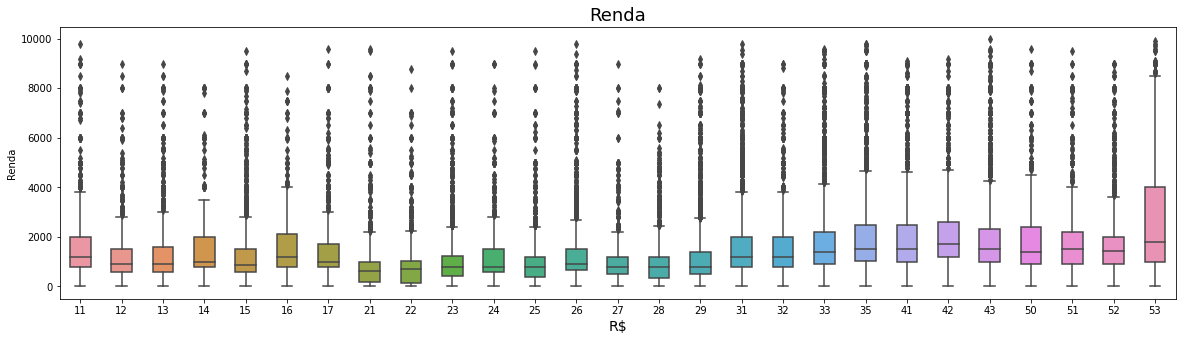

In [95]:
ax = sns.boxplot(x = 'UF', y='Renda', data=dados.query('Renda < 10000'), orient='v',width=0.5)
ax.figure.set_size_inches(20,5)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize = 14)
ax

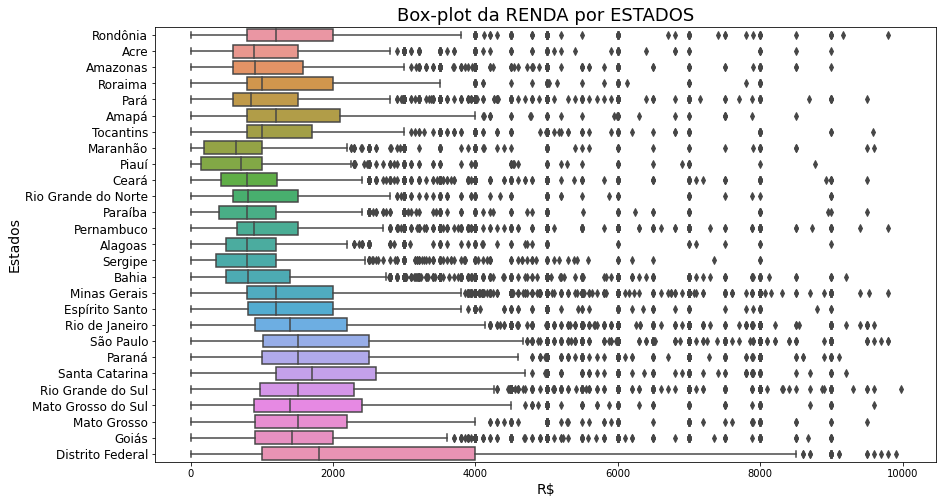

In [97]:
#vindo da correção
ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax

> ### Conclusões

Escreva suas conclusões aqui...